In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd
import os



In [ ]:
# ticker_symbol = ["MMM", "ABBV", "ACN", "ATVI", "AFL", "A", "APD", "LNT", "MO", "AEP", 
#  "AXP", "AIG", "AMGN", "ADI", "ANSS", "AON", "AAPL", "AMAT", "APTV", "AJG", 
#  "T", "BMY", "BKR", "BIIB", "BLK", "BA", "BXP", "BMY", "CAT", "CRL", "CVX", 
#  "CI", "CTSH", "CL", "CMCSA", "COP", "COST", "DHR", "DOW", "DUK", "XOM", 
#  "FAST", "FDX", "GD", "GE", "GILD", "HCA", "HD", "HON", "IBM", "INTC", "JNJ", 
#  "JPM", "K", "LHX", "LLY", "LMT", "LOW", "MA", "MCD", "MDT", "MET", "MS", 
#  "MSFT", "NKE", "NEE", "NOC", "NVDA", "ORCL", "PEP", "PFE", "PG", "PGR", "PLD", 
#  "PM", "PYPL", "QCOM", "RTX", "SPGI", "T", "TRV", "UNH", "UNP", "UPS", "USB", 
#  "V", "VZ", "WBA", "WDC", "WMT", "XEL", "YUM", "ZBH", "ZION", "ZTS", "ADM", 
#  "AES", "AFL", "AIG", "AIZ", "ALB", "APD", "AXP", "BA", "BAX", "BBY", "BDX", 
#  "BEN", "BIIB", "BK", "BKR", "BLK", "BMY", "BR", "BSX", "BWA", "C", "CAG", "CAH", 
#  "CAT", "CB", "CBOE", "CCI", "CCL", "CDNS", "CE", "CF", "CHD", "CHRW", "CI", 
#  "CL", "CLX", "CMA", "CMCSA", "COP", "COST", "CPB", "CRM", "CSCO", "CSX", "CTSH", 
#  "CVX", "D", "DHI", "DHR", "DIS", "DOV", "DWDP", "DXC", "ECL", "ED", "EFX", 
#  "EIX", "EL", "EMN", "EMR", "ENB", "EOG", "EQIX", "ES", "EXC", "EXP", "EXPE", 
#  "F", "FAST", "FB", "FCX", "FDX", "FE", "FFIV", "FIS", "FISV", "FLT", "FMX", 
#  "FOXA", "FOX", "GD", "GE", "GIS", "GILD", "GLW", "GM", "GOOG", "GOOGL", "GS", 
#  "GT", "HAL", "HAS", "HD", "HON", "HP", "HSBC", "IBM", "ICE", "IDXX", "IEX", 
#  "IFF", "ILMN", "INTC", "INTU", "IP", "IPG", "IQV", "IR", "ISRG", "IT", "ITW", 
#  "JCI", "JKHY", "JNJ", "JPM", "K", "KLAC", "KMB", "KO", "L", "LHX", "LLY", "LMT", 
#  "LNC", "LOW", "LRCX", "MA", "MAA", "MAC", "MCD", "MCK", "MDT", "MET", "MGM", 
#  "MHK", "MKC", "MMC", "MO", "MS", "MSCI", "MSFT", "MTB", "MU", "NDAQ", "NEE", 
#  "NEM", "NFLX", "NI", "NKE", "NOC", "NSC", "NTAP", "NVDA", "NVR", "ORCL", "OWW", 
#  "PFE", "PG", "PH", "PNC", "PPG", "PPL", "PRU", "PSA", "QCOM", "RTX", "SPGI", 
#  "T", "TAP", "TDG", "TFC", "TJX", "TMUS", "TRV", "UNH", "UNP", "UPS", "USB", 
#  "V", "VFC", "VLO", "VMC", "VZ", "WBA", "WDC", "WMT", "XEL", "XYL", "YUM", "ZBH", 
#  "ZION", "ZTS"]

In [ ]:
# ticker_symbol = [ "YUM", "ZBH", 
#  "ZION", "ZTS"]

ticker_symbol = "TTWO"

In [ ]:




def stock_data(stock_symbol):
    # Fetch historical data between April 1 and April 30
    start_date_str = '1986-05-13'
    end_date_str = '2025-05-16'

    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')


    ticker_data = yf.Ticker(stock_symbol)
    hist = ticker_data.history(start=start_date, end=end_date, interval="1d")

    # Add previous day's close
    hist['Prev Close'] = hist['Close'].shift(1)

    # Calculate (N Close / N-1 Close) - 1 → daily return
    hist['Daily Return'] = ((hist['Close'] / hist['Prev Close']) - 1)

    # Drop the first row (NaN because no previous day)
    result = hist[['Prev Close', 'Close', 'Daily Return']].dropna()

    return result

result = stock_data(ticker_symbol)


In [ ]:
print(result)

In [27]:
def calculate_confidence_interval(data, column='Daily Return', confidence_level=0.95):
    mean = np.mean(data[column])
    std_dev = np.std(data[column], ddof=1)
    n = len(data[column])
    
    # Get Z-score (for normal distribution)
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    
    # Calculate margin of error
    margin_of_error = z_score * (std_dev / np.sqrt(n))
    
    # Calculate confidence interval
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    # print(f"{int(confidence_level * 100)}% Confidence Interval for {column}: ({ci_lower:.6f}, {ci_upper:.6f})")
    return ci_lower, ci_upper

# print(calculate_confidence_interval(result, column='Daily Return', confidence_level=0.99))

def calculate_confidence_interval(mean, std_dev, n, confidence_level=0.95):
    # Get Z-score (for normal distribution)
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)
    
    # Calculate margin of error
    margin_of_error = z_score * (std_dev / np.sqrt(n))
    
    # Calculate confidence interval
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    
    print(f"marginal error: {margin_of_error}")
    return ci_lower, ci_upper

In [ ]:
mean_annual = np.mean(result['Daily Return']) * 252/4
print(f"Annualized Daily Return: {mean_annual:.6f}")
std_annual = np.std(result['Daily Return'], ddof=1) * np.sqrt(252/4)
print(f"Annualized Daily Volatility: {std_annual:.6f}")

ticker_confidence = calculate_confidence_interval(mean_annual, std_annual, len(result['Daily Return']), confidence_level=0.95)
ci_lower_annual, ci_upper_annual = ticker_confidence

print(f"Annulized Return of {ticker_symbol}")
print(f"95% CI for Annualized Daily Return: ({ci_lower_annual:.6f}, {ci_upper_annual:.6f})")
print(f"Return is projected to be from {ci_lower_annual * 100:.6f}% to {ci_upper_annual * 100:.6f}% in 1 year")

In [28]:
def plot_daily_returns_with_std(data, column):
    """Plot histogram of daily returns within ±4 SD."""
    # std_dev = calculate_std(data, column)
    std_dev = std_dev = np.std(data[column])
    mean = np.mean(data[column])
    
    # Filter data within ±4 SD
    lower_bound = mean - 4 * std_dev
    upper_bound = mean + 4 * std_dev
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    plt.figure(figsize=(10, 6))
    
    plt.hist(filtered_data[column], bins=20, edgecolor='black')
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.4f}')
    plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+1 STD: {mean + std_dev:.4f}')
    plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-1 STD: {mean - std_dev:.4f}')
    plt.axvline(mean + 2 * std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+2 STD: {mean + 2 * std_dev:.4f}')
    plt.axvline(mean - 2 * std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-2 STD: {mean - 2 * std_dev:.4f}')
    plt.axvline(mean + 3 * std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+3 STD: {mean + 3 * std_dev:.4f}')
    plt.axvline(mean - 3 * std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-3 STD: {mean - 3 * std_dev:.4f}')
    plt.axvline(mean + 4 * std_dev, color='green', linestyle='dashed', linewidth=1, label=f'+4 STD: {mean + 4 * std_dev:.4f}')
    plt.axvline(mean - 4 * std_dev, color='green', linestyle='dashed', linewidth=1, label=f'-4 STD: {mean - 4 * std_dev:.4f}')
    
    plt.title('Frequency of Daily Returns within ±4 SD')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

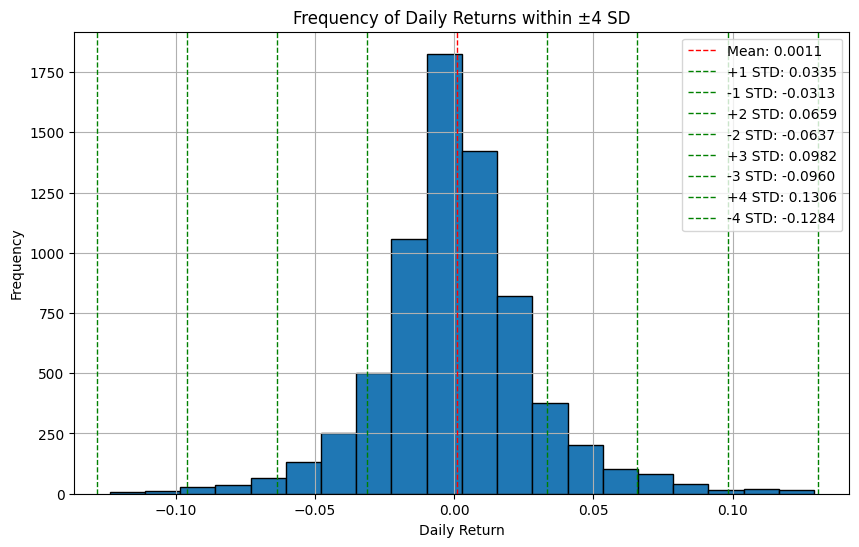

In [29]:
plot_daily_returns_with_std(result, column='Daily Return')

In [ ]:

# # Define the ticker symbol
# ticker_symbol = 'JPM'  #Company Stock Symbol

# # Fetch historical data between April 1 and April 30
# start_date_str = '1986-05-13'
# end_date_str = '2025-05-16'

# start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
# end_date = datetime.strptime(end_date_str, '%Y-%m-%d')


# ticker_data = yf.Ticker(ticker_symbol)
# hist = ticker_data.history(start=start_date, end=end_date, interval="1d")

# # Add previous day's close
# hist['Prev Close'] = hist['Close'].shift(1)

# # Calculate (N Close / N-1 Close) - 1 → daily return
# hist['Daily Return'] = ((hist['Close'] / hist['Prev Close']) - 1)

# # Drop the first row (NaN because no previous day)
# result = hist[['Prev Close', 'Close', 'Daily Return']].dropna()

# df = pd.DataFrame(result)
